In [3]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from helper import charts, lib

In [4]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

In [5]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(6,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature], y=df[label], batch_size=batch_size, epochs=epochs)

  return history

In [6]:
# The following variables are the hyperparameters.
learning_rate = 0.001
epoch_count = 50
batch_size = 64

# Specify the feature and the label.
my_feature = ["longitude", "latitude", "total_rooms", "total_bedrooms", "population", "households"]
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Invoke the functions.
my_model = build_model(learning_rate)
history = train_model(my_model, training_df, my_feature, my_label, epoch_count, batch_size)

Epoch 1/50
266/266 [==============================] - 1s 1ms/step - loss: 324847.5938 - root_mean_squared_error: 569.9540
Epoch 2/50
266/266 [==============================] - 0s 921us/step - loss: 200958.7812 - root_mean_squared_error: 448.2843
Epoch 3/50
266/266 [==============================] - 0s 981us/step - loss: 163204.3594 - root_mean_squared_error: 403.9856
Epoch 4/50
266/266 [==============================] - 0s 947us/step - loss: 129055.0938 - root_mean_squared_error: 359.2424
Epoch 5/50
266/266 [==============================] - 0s 902us/step - loss: 100627.6562 - root_mean_squared_error: 317.2186
Epoch 6/50
266/266 [==============================] - 0s 921us/step - loss: 77706.7188 - root_mean_squared_error: 278.7592
Epoch 7/50
266/266 [==============================] - 0s 1ms/step - loss: 59800.9531 - root_mean_squared_error: 244.5423
Epoch 8/50
266/266 [==============================] - 0s 902us/step - loss: 46330.8828 - root_mean_squared_error: 215.2461
Epoch 9/50
266/

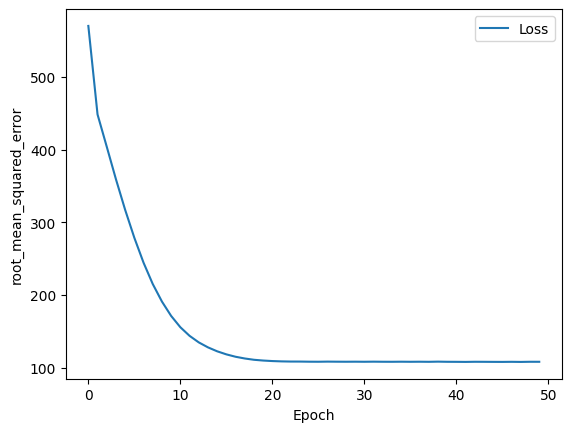

In [7]:
#saving history and epcohs to dataframe
epochs = history.epoch
hist = pd.DataFrame(history.history)
rmse = hist["root_mean_squared_error"]
charts.plot_training_loss(rmse)

In [11]:
#sampling data to test/validate on
sample_df = training_df.sample(n=200, ignore_index=True)
features = sample_df[my_feature]
predictions = my_model.predict(features).ravel()
sample_df["prediction"] = predictions

sample_df.head()

7/7 [==============================] - 0s 2ms/step


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,prediction
0,-119.80,36.77,52.0,2964.0,512.0,1114.0,486.0,3.8105,87.6,229.549683
1,-118.07,34.10,28.0,676.0,177.0,543.0,185.0,3.2361,187.5,189.236145
2,-122.66,37.93,42.0,1505.0,324.0,553.0,277.0,4.1792,350.0,210.347336
3,-121.00,37.65,52.0,3887.0,803.0,1768.0,779.0,2.5089,119.0,223.221588
4,-119.17,34.16,17.0,5276.0,1020.0,4066.0,984.0,4.5828,205.4,117.767120


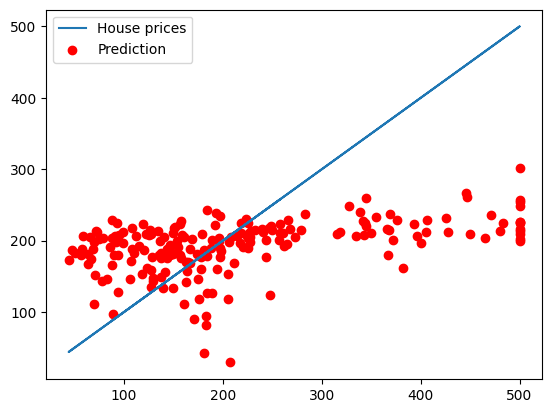

In [12]:
charts.plot_model_accuracy(sample_df, my_label, label="House prices")


In [ ]:
#weights per features
weights = pd.DataFrame.from_dict({
    "feature" : my_feature,
    "weight" : my_model.get_weights()[0].ravel(),
    "correlation" : training_df.corr()["median_house_value"].filter(items=my_feature)
})

weights
my_model.get_weights()

[array([[-1.416647  ],
        [ 0.81287885],
        [ 0.04081986],
        [-0.2599506 ],
        [-0.06180122],
        [ 0.2591897 ]], dtype=float32),
 array([1.754671], dtype=float32)]